In [19]:
import sys
sys.path.append('..')  # 添加上级目录到搜索路径
from utils import *

In [20]:
G0 = nx.read_graphml("Metabolic.graphml")
N, M = nx.number_of_nodes(G0), nx.number_of_edges(G0)
print(nx.number_of_nodes(G0), nx.number_of_edges(G0))
print(nx.is_connected(G0))
avk0 = 2*M/N
print("The average degree of the initial Metabolic G0 network is: ", f"{avk0:.4f}")

node_size0 = get_node_size(G0)
nodesize = list(node_size0.values())
pos = get_node_coordinates(G0)

DC_plus = cal_DC_plus(G0)
sequence = dict(sorted(DC_plus.items(), key=lambda x: x[1], reverse=False))

1436 4718
True
The average degree of the initial Metabolic G0 network is:  6.5710


#### DC_plus: 按照DC_plus值从小到大移除节点

In [21]:
G = G0.copy()
q = 0.4 # 移除节点的比例
G1 = remove_nodes(G, sequence, N, q)
G1 = get_LCC(G1)
# print(nx.is_connected(G1))
nodesize1 = [node_size0[i] for i in G1.nodes()]
pos1 = {i: pos[i] for i in G1.nodes()}
print(nx.number_of_nodes(G1), nx.number_of_edges(G1))
avk1 = 2*nx.number_of_edges(G1)/nx.number_of_nodes(G1)
print("The average degree of the subnetwork G1 is: ", f"{avk1:.4f}")

G = G0.copy()
q = 0.6
G2 = remove_nodes(G, sequence, N, q)
G2 = get_LCC(G2)
# print(nx.is_connected(G2))
nodesize2 = [node_size0[i] for i in G2.nodes()]
pos2 = {i: pos[i] for i in G2.nodes()}
print(nx.number_of_nodes(G2), nx.number_of_edges(G2))
avk2 = 2*nx.number_of_edges(G2)/nx.number_of_nodes(G2)
print("The average degree of the subnetwork G2 is: ", f"{avk2:.4f}")

G = G0.copy()
q = 0.8
G3 = remove_nodes(G, sequence, N, q)
G3 = get_LCC(G3)
# print(nx.is_connected(G3))
nodesize3 = [node_size0[i] for i in G3.nodes()]
pos3 = {i: pos[i] for i in G3.nodes()}
print(nx.number_of_nodes(G3), nx.number_of_edges(G3))
avk3 = 2*nx.number_of_edges(G3)/nx.number_of_nodes(G3)
print("The average degree of the subnetwork G3 is: ", f"{avk3:.4f}")

862 3410
The average degree of the subnetwork G1 is:  7.9118
575 2545
The average degree of the subnetwork G2 is:  8.8522
288 1452
The average degree of the subnetwork G3 is:  10.0833


In [22]:
k0, Pk0 = get_ccdf(G0)
k1, Pk1 = get_ccdf(G1)
k2, Pk2 = get_ccdf(G2)
k3, Pk3 = get_ccdf(G3)

pdf_entropy = [get_pdf_entropy(G0), get_pdf_entropy(G1), get_pdf_entropy(G2), get_pdf_entropy(G3)]
print(pdf_entropy)


[3.57151631653287, 3.5436787201683773, 3.6337202988466855, 3.551978133682635]


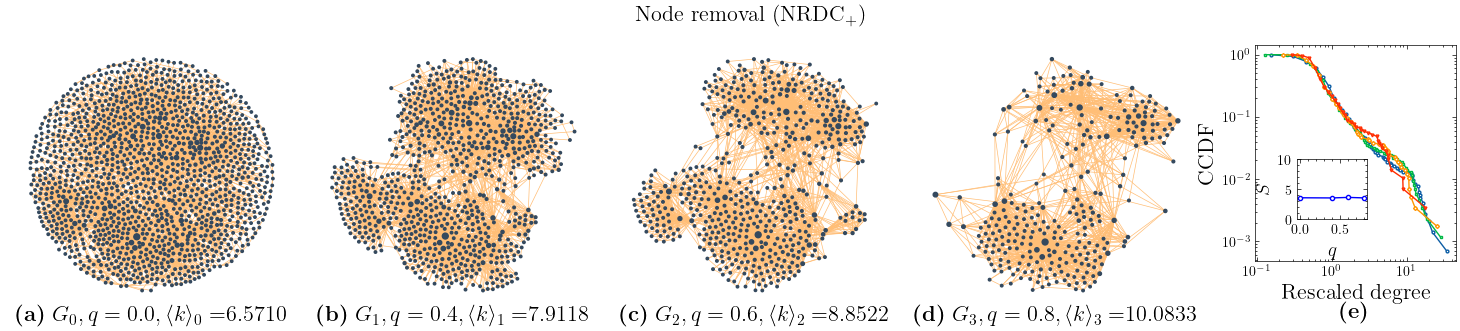

In [23]:
# 绘制节点colormap图
fig, axs = plt.subplots(1, 5, figsize=(15, 3.3), constrained_layout=True)
fig.suptitle("Node removal (NRDC$_{+}$)", fontsize=16)

ax = axs[0]
nx.draw(G0, pos, node_size=nodesize, node_color="#34495e", width=0.5, edge_color="#ffbe76", ax = axs[0])
ax.set_title(r"\textbf{(a)} $G_0, q = 0.0, \langle k \rangle_0 = $" + f"{avk0:.4f}", y=-0.05, fontsize=16)

ax = axs[1]
nx.draw(G1, pos1, node_size=nodesize1, node_color="#34495e", width=0.5, edge_color="#ffbe76", ax = axs[1])
ax.set_title(r"\textbf{(b)} $G_1, q = 0.4, \langle k \rangle_1 = $" + f"{avk1:.4f}", y=-0.05, fontsize=16)

ax = axs[2]
nx.draw(G2, pos2, node_size=nodesize2, node_color="#34495e", width=0.5, edge_color="#ffbe76", ax = axs[2])
ax.set_title(r"\textbf{(c)} $G_2, q = 0.6, \langle k \rangle_2 = $" + f"{avk2:.4f}", y=-0.05, fontsize=16)

ax = axs[3]
nx.draw(G3, pos3, node_size=nodesize3, node_color="#34495e", width=0.5, edge_color="#ffbe76", ax = axs[3])
ax.set_title(r"\textbf{(d)} $G_3, q = 0.8, \langle k \rangle_3 = $" + f"{avk3:.4f}", y=-0.05, fontsize=16)


ax = axs[4]
pos4 = ax.get_position()
# 设置新位置：增加左右空白（减小宽度），增加上下空白（减小高度）
new_pos = [
    pos4.x0 + 0.07,   # 左边界向右移动5%
    pos4.y0 + 0.1,   # 下边界向上移动20%
    pos4.width * 1.0, # 宽度减少30%
    pos4.height * 0.85  # 高度减少30%
]

ax.set_position(new_pos)

ax.plot(k0, Pk0, marker = 'o', markersize = 2.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$q=0.0$")
ax.plot(k1, Pk1, marker = 's', markersize = 2.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$q=0.4$")
ax.plot(k2, Pk2, marker = 'D', markersize = 2.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$q=0.6$")
ax.plot(k3, Pk3, marker = 'v', markersize = 2.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$q=0.8$")
ax.set_xlabel("Rescaled degree", fontsize=16)
ax.set_ylabel("CCDF", fontsize=16)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title(r"\textbf{(e)}", y=-0.3, fontsize=16)


inset_ax = inset_axes(ax, width=0.7, height=0.6, loc=3, borderpad=3)
inset_ax.plot([0.0,0.4,0.6,0.8], pdf_entropy, color="blue", marker ="o", markersize = 3.0, markerfacecolor="w", clip_on=False)
inset_ax.set_ylim([0, 10])
inset_ax.set_xlabel('$q$', fontsize=14)
inset_ax.set_ylabel('$S$', fontsize=14)

plt.savefig("Fig1_NRDC_plus.pdf")
plt.show()

#### DC_plus': 按照DC_plus值从小到大移除节点，进而对子图进行连边剪枝处理使其与初始网络具有相近的平均度

In [24]:
kmin = 1

In [25]:
G = G0.copy()
q = 0.4
G1 = remove_nodes(G, sequence, N, q)
G1 = get_LCC(G1)
nodesize1 = [node_size0[i] for i in G1.nodes()]
pos1 = {i: pos[i] for i in G1.nodes()}
N1, M1 = nx.number_of_nodes(G1), nx.number_of_edges(G1)
avk1 = 2*M1/N1
print(f"{avk1:.4f}")
if avk1 > avk0:
    G1 = local_degree_sparsification(G1, avk0, kmin)
    print(nx.number_of_nodes(G1), nx.number_of_edges(G1))
    avk1_prune = 2*nx.number_of_edges(G1)/nx.number_of_nodes(G1)
    print("The average degree of the pruned subnetwork G1 is: ", f"{avk1_prune:.4f}")

G = G0.copy()
q = 0.6
G2 = remove_nodes(G, sequence, N, q)
G2 = get_LCC(G2)
nodesize2 = [node_size0[i] for i in G2.nodes()]
pos2 = {i: pos[i] for i in G2.nodes()}
N2, M2 = nx.number_of_nodes(G2), nx.number_of_edges(G2)
avk2 = 2*M2/N2
print(f"{avk2:.4f}")
if avk2 > avk0:
    G2 = local_degree_sparsification(G2, avk0, kmin)
    print(nx.number_of_nodes(G2), nx.number_of_edges(G2))
    avk2_prune = 2*nx.number_of_edges(G2)/nx.number_of_nodes(G2)
    print("The average degree of the pruned subnetwork G2 is: ", f"{avk2_prune:.4f}")

G = G0.copy()
q = 0.8
G3 = remove_nodes(G, sequence, N, q)
G3 = get_LCC(G3)
nodesize3 = [node_size0[i] for i in G3.nodes()]
pos3 = {i: pos[i] for i in G3.nodes()}
N3, M3 = nx.number_of_nodes(G3), nx.number_of_edges(G3)
avk3 = 2*M3/N3
print(f"{avk3:.4f}")
if avk3 > avk0:
    G3 = local_degree_sparsification(G3, avk0, kmin)
    print(nx.number_of_nodes(G3), nx.number_of_edges(G3))
    avk3_prune = 2*nx.number_of_edges(G3)/nx.number_of_nodes(G3)
    print("The average degree of the pruned subnetwork G3 is: ", f"{avk3_prune:.4f}")

7.9118
862 2836
The average degree of the pruned subnetwork G1 is:  6.5800
8.8522
575 1892
The average degree of the pruned subnetwork G2 is:  6.5809
10.0833
288 947
The average degree of the pruned subnetwork G3 is:  6.5764


In [26]:
k1, Pk1 = get_ccdf(G1)
k2, Pk2 = get_ccdf(G2)
k3, Pk3 = get_ccdf(G3)

pdf_entropy_prune = [get_pdf_entropy(G0), get_pdf_entropy(G1), get_pdf_entropy(G2), get_pdf_entropy(G3)]
print(pdf_entropy_prune )

[3.57151631653287, 3.513884276238973, 3.5203188445281834, 3.4418903125888742]


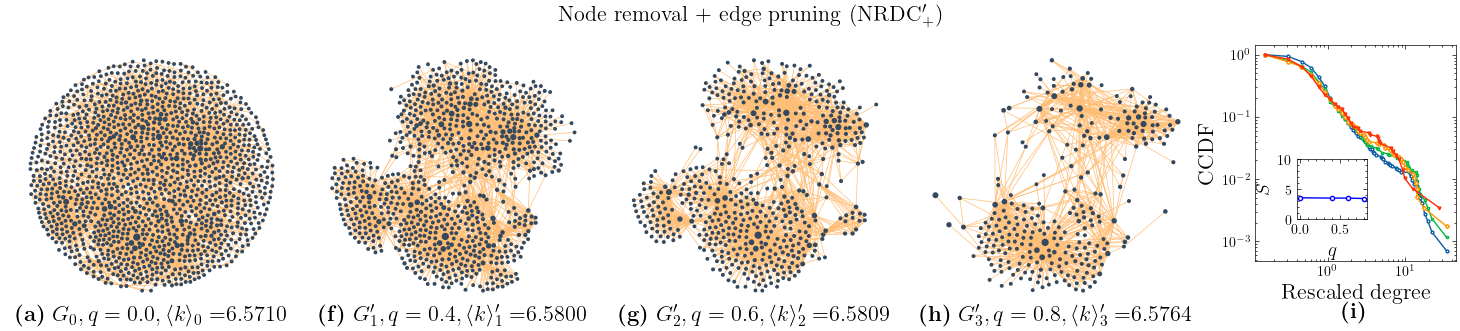

In [27]:
fig, axs = plt.subplots(1, 5, figsize=(15, 3.3), constrained_layout=True)
fig.suptitle("Node removal + edge pruning (NRDC$_{+}^{\prime}$)", fontsize=16)

ax = axs[0]
nx.draw(G0, pos, node_size=nodesize, node_color="#34495e", width=0.5, edge_color="#ffbe76", ax = axs[0])
ax.set_title(r"\textbf{(a)} $G_0, q = 0.0, \langle k \rangle_0 = $" + f"{avk0:.4f}", y=-0.05, fontsize=16)

ax = axs[1]
nx.draw(G1, pos1, node_size=nodesize1, node_color="#34495e", width=0.5, edge_color="#ffbe76", ax = axs[1])
ax.set_title(r"\textbf{(f)} $G_1^{\prime}, q = 0.4, \langle k \rangle_1^{\prime} = $" + f"{avk1_prune:.4f}", y=-0.05, fontsize=16)

ax = axs[2]
nx.draw(G2, pos2, node_size=nodesize2, node_color="#34495e", width=0.5, edge_color="#ffbe76", ax = axs[2])
ax.set_title(r"\textbf{(g)} $G_2^{\prime}, q = 0.6, \langle k \rangle_2^{\prime} = $" + f"{avk2_prune:.4f}", y=-0.05, fontsize=16)

ax = axs[3]
nx.draw(G3, pos3, node_size=nodesize3, node_color="#34495e", width=0.5, edge_color="#ffbe76", ax = axs[3])
ax.set_title(r"\textbf{(h)} $G_3^{\prime}, q = 0.8, \langle k \rangle_3^{\prime} = $" + f"{avk3_prune:.4f}", y=-0.05, fontsize=16)

ax = axs[4]
ax = axs[4]
pos4 = ax.get_position()
# 设置新位置：增加左右空白（减小宽度），增加上下空白（减小高度）
new_pos = [
    pos4.x0 + 0.07,
    pos4.y0 + 0.1, 
    pos4.width * 1.0, 
    pos4.height * 0.85
]

ax.set_position(new_pos)

ax.plot(k0, Pk0, marker = 'o', markersize = 2.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$q=0.0$")
ax.plot(k1, Pk1, marker = 's', markersize = 2.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$q=0.4$")
ax.plot(k2, Pk2, marker = 'D', markersize = 2.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$q=0.6$")
ax.plot(k3, Pk3, marker = 'v', markersize = 2.0, markerfacecolor="w", linewidth = 1.0, clip_on=False, label="$q=0.8$")

ax.set_xlabel("Rescaled degree", fontsize=16)
ax.set_ylabel("CCDF", fontsize=16)
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_title(r"\textbf{(i)}", y=-0.3, fontsize=16)

inset_ax = inset_axes(ax, width=0.7, height=0.6, loc=3, borderpad=3)
inset_ax.plot([0.0,0.4,0.6,0.8], pdf_entropy_prune, color="blue", marker ="o", markersize = 3.0, markerfacecolor="w", clip_on=False)
inset_ax.set_ylim([0, 10])
inset_ax.set_xlabel('$q$', fontsize=14)
inset_ax.set_ylabel('$S$', fontsize=14)

plt.savefig("Fig1_NRDC_plus_prune.pdf")
plt.show()